# Figure 6e. UpSet plot for AD-xQTL colocalization.

An UpSet plot focusing showing the distinct colocalization patterns across xQTLs exhibited by 95% CoS from AD-xQTL ColocBoost.

In [1]:
res <- readRDS("data/Figure_6e.rds")
all_pheno <- c("Mic","Ast","Oli","OPC","Exc","Inh", "DLPFC", "AC", "PCC", "Monocyte",
               "pQTL", "AC_productive", "AC_unproductive", "DLPFC_productive", "DLPFC_unproductive", 
               "PCC_productive", "PCC_unproductive", "ADGWAS")
coloc_pheno <- lapply(res$colocalized_phenotypes, function(cp) unlist(strsplit(cp, "; ")) )
coloc <- lapply(all_pheno, function(ap){
  pos <- sapply(coloc_pheno, function(cp) ap %in% cp )
  which(pos)
})
names(coloc) <- all_pheno
names(coloc) <- c("Mic (DLPFC)", "Ast (DLPFC)", "Oli (DLPFC)", "OPC (DLPFC)", "Exc (DLPFC)", "Inh (DLPFC)",
                  "eQTL (DLPFC)", "eQTL (AC)", "eQTL (PCC)", "eQTL (Monocyte)","pQTL (DLPFC)", 
                  "p-sQTL (AC)", "u-sQTL (AC)", "p-sQTL (DLPFC)", "u-sQTL (DLPFC)", "p-sQTL (PCC)", "u-sQTL (PCC)",
                  "AD GWAS")
coloc <- coloc[c(1,2,5,7,8,9,10,11,13,18)]
tmp <- res[coloc$`Mic (DLPFC)`,]
max_size <- max(sapply(coloc, length))
library("UpSetR")
p1 <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2.5,0,2.5,2.5,0), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 0, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = c("pQTL (DLPFC)", "u-sQTL (AC)", "Ast (DLPFC)", "Exc (DLPFC)", "Mic (DLPFC)",
                     "eQTL (DLPFC)", "eQTL (AC)", "eQTL (PCC)", "eQTL (Monocyte)", "AD GWAS"),
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 6,
            set_size.scale_max = max_size + 0.2*max_size,
            nintersects = 12,
            mainbar.y.label = "Number of 95% CoS for\n each configuration",
            sets.x.label = NULL)

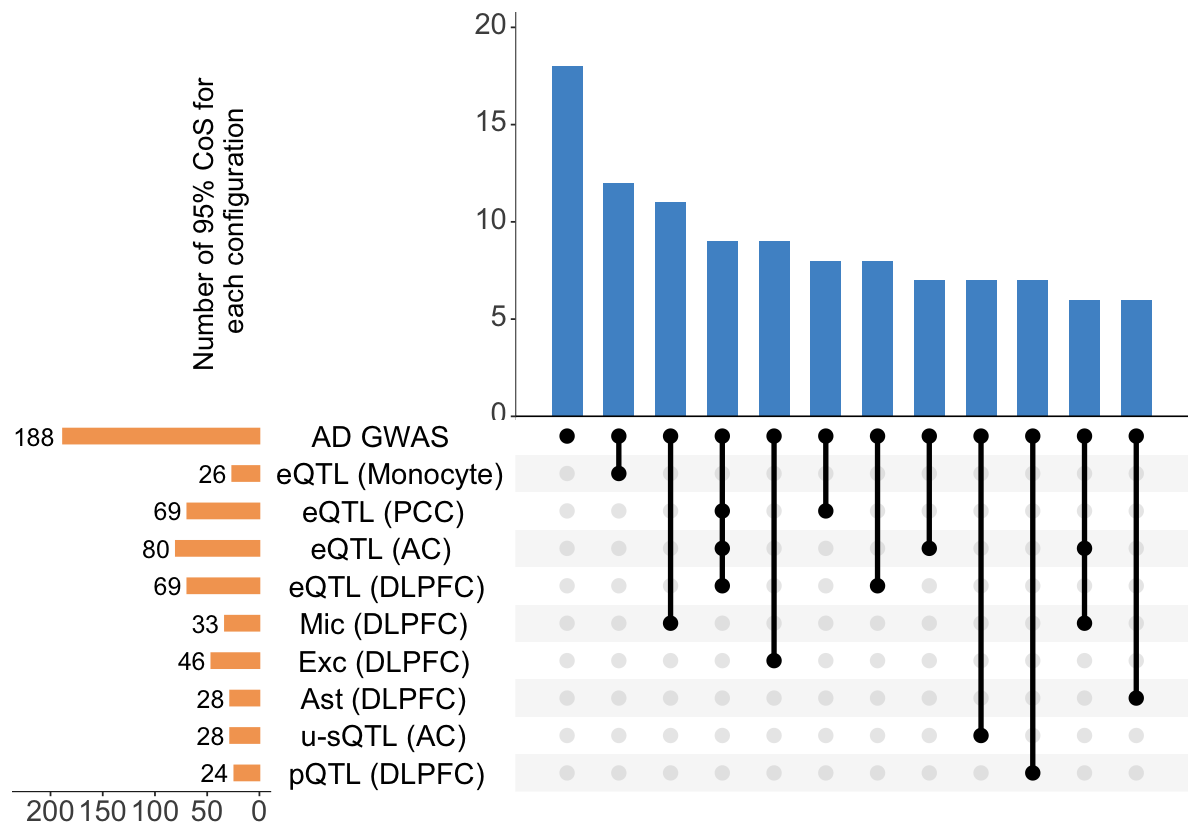

In [4]:
options(repr.plot.width = 10, repr.plot.height = 7)
p1